<a href="https://colab.research.google.com/github/yashyakumar/Hotel_Booking_Analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

#Importing required packages for Data Cleaning,Manipulation,Visualisation

In [2]:
#Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

In [3]:
from google.colab import drive                      #Mounting our drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
file_path='/content/drive/MyDrive/Copy of Hotel Bookings.csv'     #File path to our data
df=pd.read_csv(file_path)                                         #Loading data into our dataframe

# Lets understand the data
###hotel

*   City Hotel
*   Resort Hotel


###is_canceled-The customer canceled the booking or not


*   0:Not Canceled
*   1:Canceled


###lead_time-days between booking and arrival
###arrival_date_year

*   Year of arrival(2015 - 2017)

###arrival_date_month
*   Month of arrival(January-December)

###arrival_date_week_number 

*   Week number of arrival(1 - 53)

###arrival_date_day_of_month
*   Day of arrival(1-31)

###stays_in_weekend_nights
*  No of weekend nights (Sat/Sun) the customer stayed or booked to stay at the hotel

###stays_in_week_nights
*  No of week nights (Mon - Fri) the customer stayed or booked to stay at the hotel

###adults
###children
###babies
###meal-Type of meal
*  BB : Bed and Breakfast
*  HB : Half Board(Breakfast and one meal mostly dinner)
*  FB : Full Board(Breakfast, Lunch, Dinner)
*  SC/Undefined: No Meal package

###Country - Country of the customer
###market_segment
###distribution_channel
###is_repeated_guest - whether the booking is from repeated customer
* 1 : Yes
* 0 : No

###deposit_type - whether customer made a deposit to guarantee the booking
* No Deposit : No deposit was made
* Non Refund : Deposit was made which cant be refunded
* Refundable : Deposit was made which can be refundable

### customer_type 
* Contract : When the booking is associated to a contract
* Group    : When the booking is associated to a group
* Transient : When the booking is associated to a transient customer
* Transient Group : When the booking is associated to a transient group
  
###adr(Average Daily Rate)
* ADR  = $\frac{Revenue Earned by Rooms}{Noof Rooms Sold}$

###Looking to shape of data to find out no of rows and columns

In [5]:
df.shape

(119390, 32)

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#Data Cleaning

##Finding no of Nan or Null values present in our dataset

In [9]:
df.isnull().sum()        #finding sum of null values in each column

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
df.isnull().sum()/len(df.index)*100   # finding percentage of null vaules in each column

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

###There are 94% of values in company are null values so we can drop the whole column.The agent column also having 13% of null values and we dont need this agent column.So we can drop these columns

In [11]:
df.drop(['company','agent'],inplace=True,axis=1) #dropping columns which have most no of null values

### There are some 488 rows having null values which is negligible in 118938 so we simply dropping these rows and other rows which are having null values

In [12]:
df.dropna(axis=0,inplace=True) # this will  drop only the rows becuase we passed axis=0

In [13]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Text(0.5, 1.0, 'Market share of hotels')

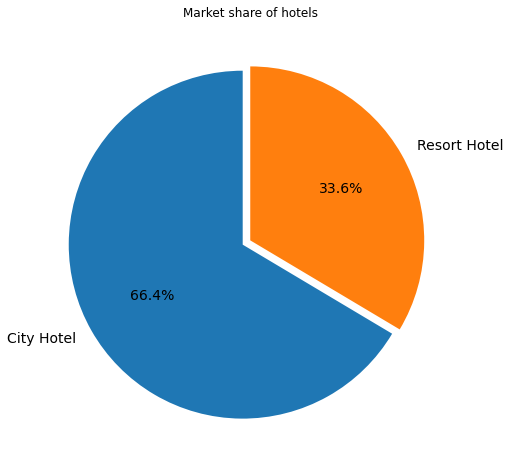

In [137]:
plt.rcParams['figure.figsize']=8,8                  #setting size of the plot
labels=df['hotel'].value_counts().index.to_list()   # changing index tolist for better usability and making them as labels for pie chart 
sizes=df['hotel'].value_counts().to_list()          # changing values to list and making  them as sizes for pie chart
explode=(0.05,0)
plt.pie(sizes,labels=labels,autopct='%1.1f%%',      # autopct used to display percentages values of our data
        explode=explode,startangle=90,              # explode used to make the wedges of pie chart to be separated from the rest of wedges
        textprops={'fontsize':14})
plt.title('Market share of hotels')                 # used to set the title of the graph

###Observations
* We can see that most of the people are choosing city hotel than resort hotel
* May be it is cheap or its having better facilities we have to see

Text(0.5, 1.0, 'Cancellation percentages')

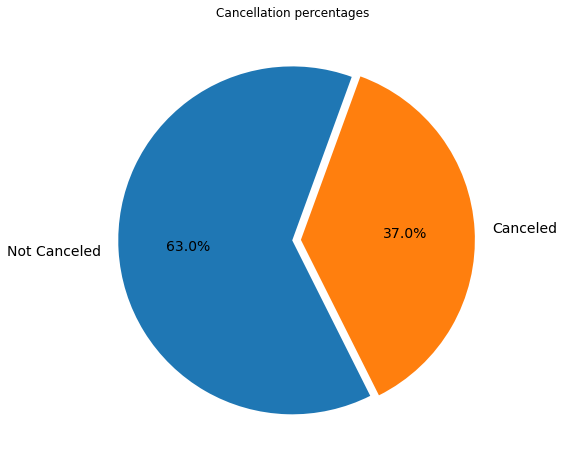

In [138]:
labels=['Not Canceled','Canceled']
sizes=df['is_canceled'].value_counts().to_list()
plt.pie(sizes,labels=labels,
        autopct='%1.1f%%',startangle=70,
        explode=(0,0.05),
        textprops={'fontsize':14})
plt.title('Cancellation percentages')

Text(0.5, 1.0, 'Cancellations rates in City Hotel and Resort Hotel')

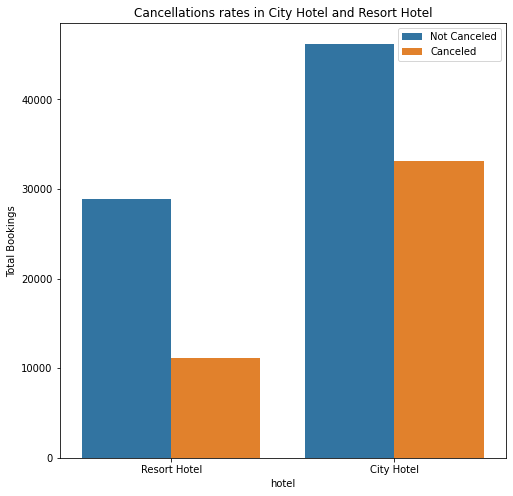

In [139]:
sns.countplot(x='hotel',data=df,hue='is_canceled')  #This makes seaborn to plot countplot which counts total bookings per hotel
                                                    # hue means it counts no of canceled bookings and not canceled bookings in this case
plt.ylabel('Total Bookings')                        #ylabel used to set y-axis name
plt.legend(['Not Canceled','Canceled'])             #legend used to set or change names of hue
plt.title('Cancellations rates in City Hotel and Resort Hotel')

###Observations
* We can see that most people are not cancelling their bookings but 37% customers had cancelled their bookings which is not that good we have to reduce this number.
* We can also see that most cancellations are occured in city hotel and there are less cancellations in resort hotel

Text(0.5, 1.0, 'Graph showing yearly bookings in different hotels')

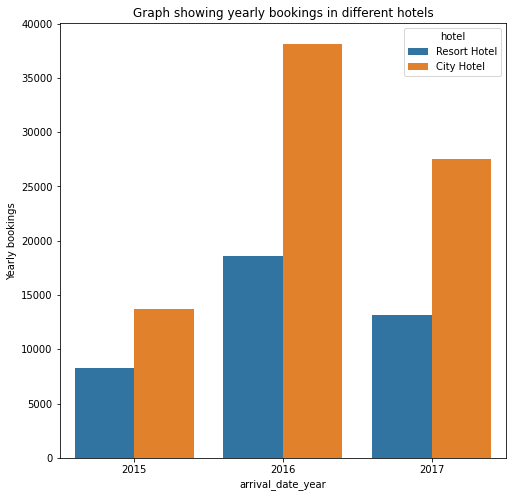

In [142]:
sns.countplot(x='arrival_date_year', data=df,hue='hotel')
plt.ylabel('No of bookings')
plt.title('Graph showing yearly bookings in different hotels')

Text(0.5, 1.0, 'Graph showing yearly canceled vs not canceled bookings')

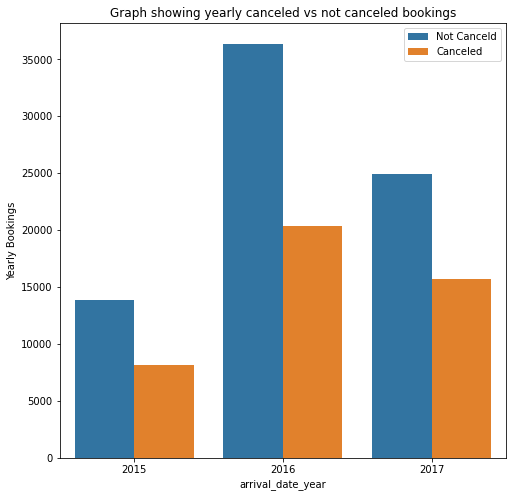

In [143]:
sns.countplot(x='arrival_date_year',data=df,hue='is_canceled')
plt.ylabel('Yearly Bookings')
plt.legend(['Not Canceld','Canceled'])
plt.title('Graph showing yearly canceled vs not canceled bookings')

###Observations
* From the above plots we can see that  peak year for bookings is 2016.  
* we can also see that theres is an increase in bookings over the years when compared to 2015 but in 2017 bookings are less compared to previous year
* The bookings cancellation also more in 2016 followed by 2017,2015

Text(0.5, 1.0, 'Graph showing monthly bookings in city and resort hotels')

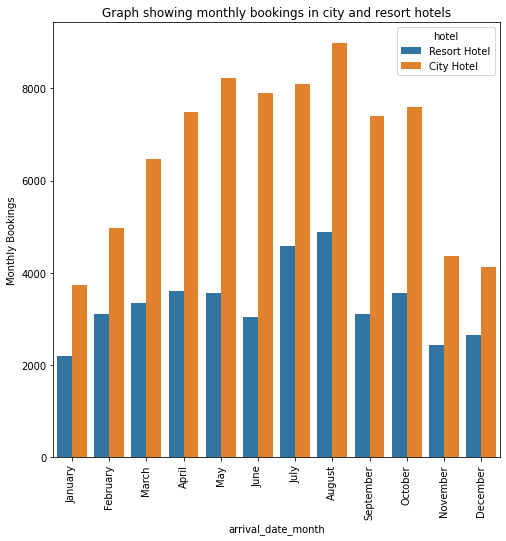

In [217]:

sns.countplot(x='arrival_date_month',data=df,hue='hotel',
              order=['January','February','March','April','May','June','July',  # By using order we can plot the bars in any order we want                                                                                 
                     'August','September','October','November','December'])     # Here i am following calendar order for better comparision
plt.ylabel('Monthly Bookings')
plt.xticks(rotation=90)
plt.title('Graph showing monthly bookings in city and resort hotels')

In [218]:
canceled=df[df['is_canceled']==0]             #making canceled data frame which has only bookings which are canceled

Text(0.5, 1.0, 'Graph showing monthly cancellations in City Hotel and Resort Hotel')

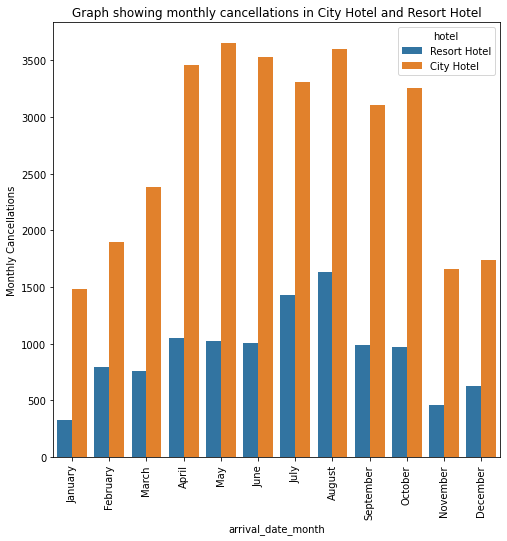

In [146]:
sns.countplot(x='arrival_date_month',data=canceled,hue='hotel',
              order=['January','February','March','April','May','June','July',
                      'August','September','October','November','December'])
plt.ylabel('Monthly Cancellations')
plt.xticks(rotation=90)                                                   #xticks used to rotate the labels when they are not fitting horizontally 
plt.title('Graph showing monthly cancellations in City Hotel and Resort Hotel')

###Observations
* From the above we can see that City Hotel has more bookings and cancellations than Resort Hotel in every month.
* The City Hotel has to  find a way to reduce their cancellations and Resort Hotel has to find a way to increase their cancellations

In [104]:
month_wise_bookings=df.groupby('arrival_date_month')['is_canceled'].count().reset_index() #creating a dataframe for monthly bookings
month_wise_bookings.sort_values('is_canceled',ascending=False,inplace=True)              #sorting the data based on no of bookings
month_wise_bookings

,arrival_date_month,is_canceled
1,August,13877
5,July,12661
8,May,11791
10,October,11160
0,April,11089
6,June,10939
11,September,10508
7,March,9794
3,February,8068
9,November,6794


Text(0.5, 1.0, 'Graph showing monthly total bookings')

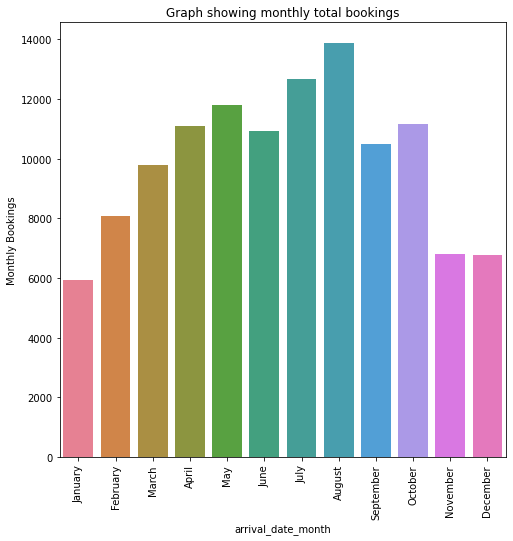

In [234]:
sns.barplot(x='arrival_date_month',y='is_canceled',data=month_wise_bookings,
            order=['January','February','March','April','May','June','July',
                   'August','September','October','November','December'],
            palette='husl')
plt.xticks(rotation=90)
plt.ylabel('Monthly Bookings')
plt.title('Graph showing monthly total bookings')

###Observations
* We can see that Most no of bookings are made for the months April to October and peak month for booking is August
* We can also see that least bookings are made for the months november to February  may be because of winter season

In [24]:
not_canceld_months=df.loc[df['is_canceled']==0].groupby('arrival_date_month')['is_canceled'].count().reset_index()
not_canceld_months.rename(columns={'is_canceled':'Monthly Bookings'},inplace=True)
not_canceld_months.sort_values('Monthly Bookings',inplace=True,ascending=False)

Text(0.5, 1.0, 'Graph showing monthly booking which are not canceled')

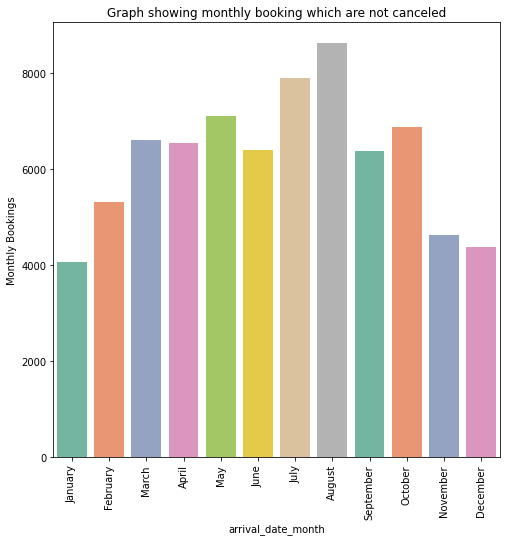

In [236]:
sns.barplot(x='arrival_date_month',y='Monthly Bookings',data=not_canceld_months,
            order=['January','February','March','April','May','June','July',
                   'August','September','October','November','December'],
            palette='Set2')
plt.xticks(rotation=90)
plt.title('Graph showing monthly booking which are not canceled')

###Observations

*   From this not canceled bookings also we can see that from March to October there are better bookings
*  From November to February people are less intersted to travel or stay in these hotels



Text(0.5, 1.0, 'Graph showing daily bookings')

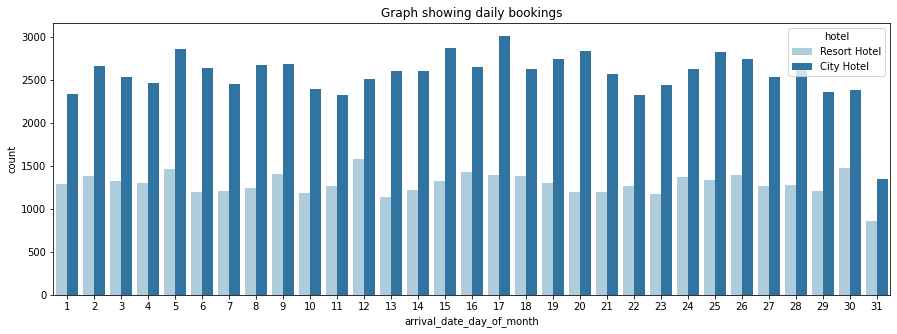

In [239]:
plt.figure(figsize=(15,5))
sns.countplot(x='arrival_date_day_of_month',hue='hotel',data=df,palette='Paired')
plt.title('Graph showing daily bookings')

###Observations
* we cannot see any particular trend based on the actual day of the month,
but we can see that there are less no of bookings towards the end of the month
* May be it is random 


Text(0.5, 1.0, 'Graph showing stays in weekend nights')

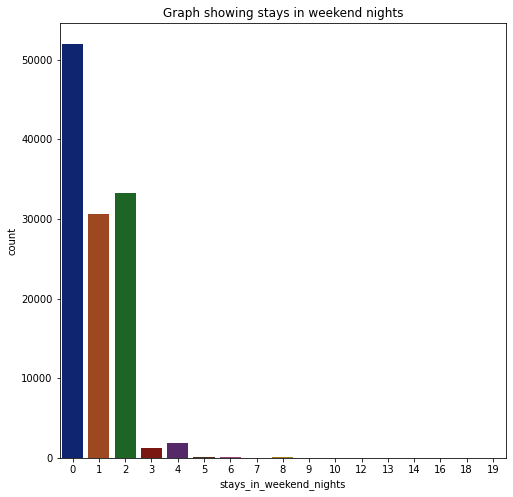

In [240]:
sns.countplot(x='stays_in_weekend_nights',data=df,palette='dark')
plt.title('Graph showing stays in weekend nights')

Text(0.5, 1.0, 'Graph showing stays in week nights')

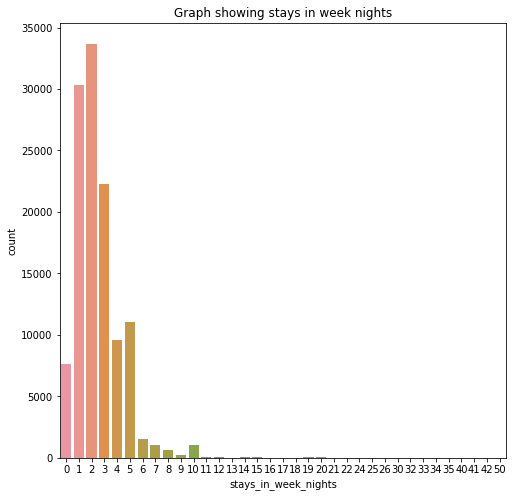

In [167]:
sns.countplot(x='stays_in_week_nights',data=df)
plt.title('Graph showing stays in week nights')

###Observations

*   We can see that most people are booked their hotel for the weekends than weekdays may be because of weekends are holidays
*  We can also see that most people are booked for staying 0 nights to 2 nights in weekends and 0 nights to 3 nights in weekdays 




In [118]:
market_segment=df['market_segment'].value_counts()      #counting no of values per each market segment
market_segment

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [150]:
booking_type=market_segment.index.to_list()         #making list of segment_types for the market_segment to plot
no_of_bookings=market_segment.to_list()             #making list of values of each category in market_segment to plot

Text(0.5, 1.0, 'Graph showing Types of Market segment')

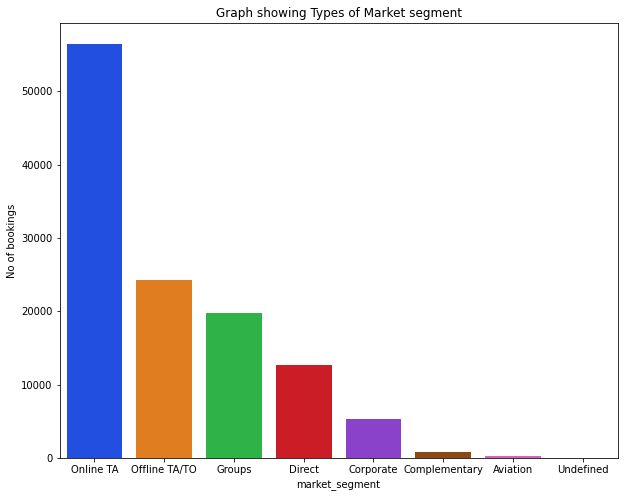

In [228]:
fig=plt.figure(figsize=(10,8))
sns.barplot(x=booking_type,y=no_of_bookings,palette='bright')
plt.xlabel('market_segment')
plt.ylabel('No of bookings')
plt.title('Graph showing Types of Market segment')

In [229]:
distributions=df['distribution_channel'].value_counts()               #counting each distribution type total bookings
distributions

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [129]:
distribution_types=distributions.index.to_list()                #making list of distribution types
no_of_bookings=distributions.to_list()                          #making list of bookings for each distribution type


Text(0.5, 1.0, 'Types of Distribution Channel')

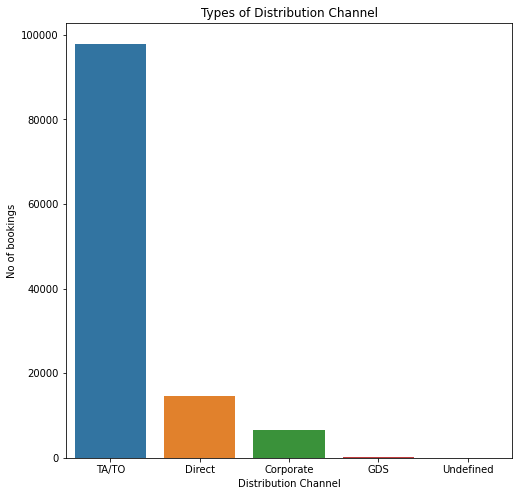

In [131]:
sns.barplot(x=distribution_types,y=no_of_bookings)
plt.xlabel('Distribution Channel')
plt.ylabel('No of bookings')
plt.title('Types of Distribution Channel')

###Observations
* we can see that most of the Bookings are made through both Online/Offline Travel agents and Tour Operators than other modes of booking

Text(0.5, 1.0, 'Types of Customers')

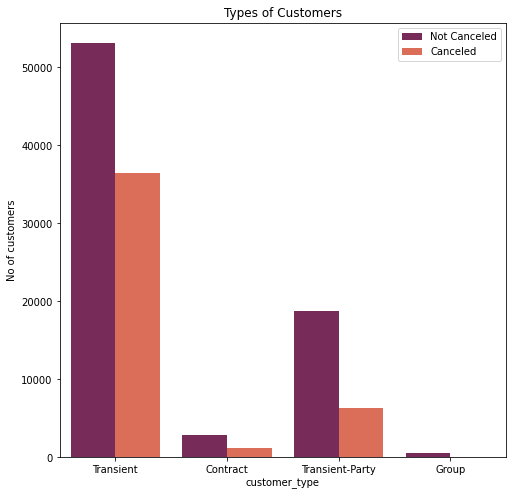

In [241]:
sns.countplot(x='customer_type',data=df,hue='is_canceled',palette='rocket')
plt.legend(['Not Canceled','Canceled'])
plt.ylabel('No of customers')
plt.title('Types of Customers')

###Observations
* We can see that most bookings are made and canceled by Transient Customers.
* We should put more focus on the Transient customers because majority of the revenue for the hotels are made by these customers
* We should also try to attract other types of customers

Text(0.5, 1.0, 'No of adults')

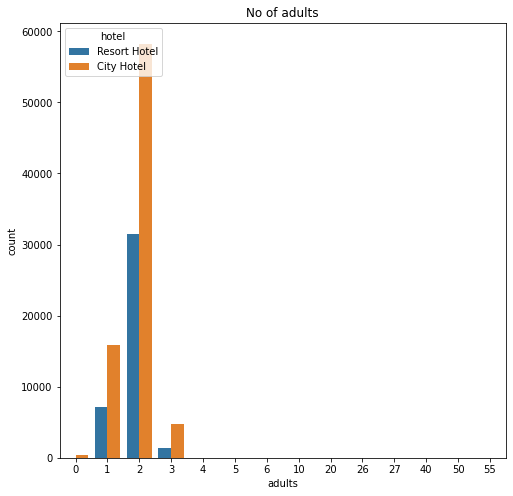

In [243]:
sns.countplot(x='adults',hue='hotel',data=df)
plt.title('No of adults')

Text(0.5, 1.0, 'No of children')

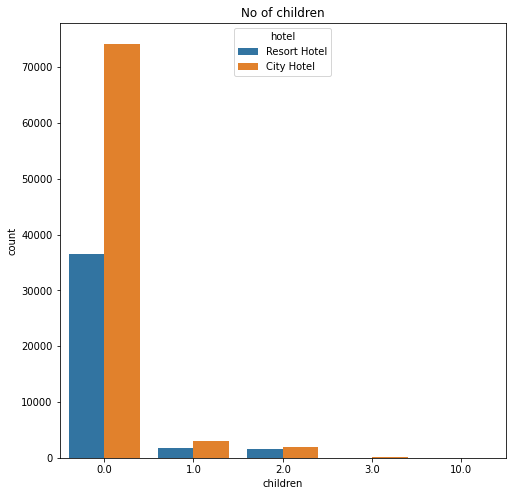

In [152]:
sns.countplot(x='children',hue='hotel',data=df)
plt.title('No of children')

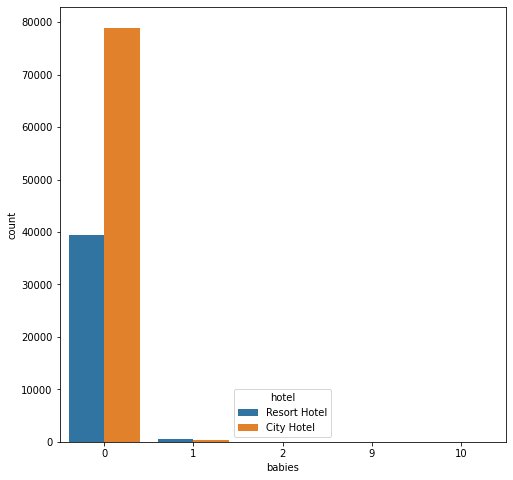

In [244]:
sns.countplot(x='babies',hue='hotel',data=df)

###Observations
* We can see that most people are comes in pair having No children and No babies
* We should focus on these people and we shold also find  a way to attract families

Text(0.5, 1.0, 'Types of deposit')

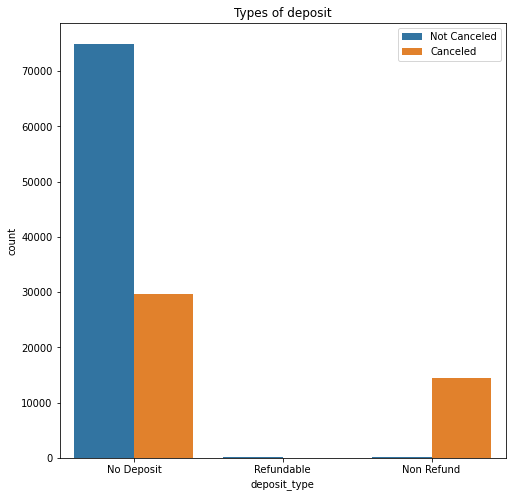

In [246]:
sns.countplot(x='deposit_type',hue='is_canceled',data=df)
plt.legend(['Not Canceled','Canceled'])
plt.title('Types of deposit')

###Observations
* We can see from the above that most of the bookings doesn't require any deposit.That is the reason we can see most no of cancellations in bookings when there is no deposit.
* Surprisingly there are most cancellations in Non Refund deposit than the Refundable

Text(0.5, 1.0, 'Graph showing repeated guests')

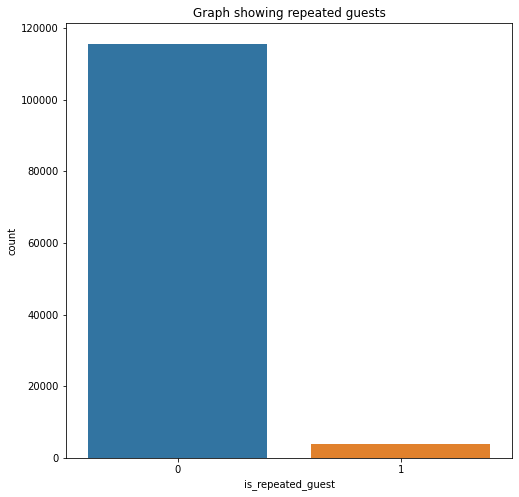

In [247]:
sns.countplot(x='is_repeated_guest',data=df)
plt.title('Graph showing repeated guests')

###Observations
* We can see that most people are not repeated guests 
* We should focus on customer satisfaction to make guests to visit the hotel again

In [189]:
countries=df.loc[df['is_canceled']==0].groupby('country')[['hotel','is_canceled']].count().reset_index()
countries.rename(columns={'is_canceled':'no_of_visitors'},inplace=True)
countries.sort_values('no_of_visitors',ascending=False,inplace=True)
countries.head(15)

,country,hotel,no_of_visitors
125,PRT,21071,21071
57,GBR,9676,9676
54,FRA,8481,8481
50,ESP,6391,6391
42,DEU,6069,6069
70,IRL,2543,2543
75,ITA,2433,2433
15,BEL,1868,1868
113,NLD,1717,1717
158,USA,1596,1596


In [188]:
import plotly.express as px # we are using plotly.express to plot choropleth map
plt.figure(figsize=(5,5))
px.choropleth(data_frame=countries,locations='country',color='no_of_visitors', #choropleth maps just like normal maps which are just be coloured
                                                                               # based on like population or any other characteristic
              hover_name='country',                                            # hover name is the one which will be showed when we hover on the map
              title='Home country of visitors')


<Figure size 360x360 with 0 Axes>

In [230]:
top_countries=countries.head(10)
top_countries

,country,hotel,no_of_visitors
125,PRT,21071,21071
57,GBR,9676,9676
54,FRA,8481,8481
50,ESP,6391,6391
42,DEU,6069,6069
70,IRL,2543,2543
75,ITA,2433,2433
15,BEL,1868,1868
113,NLD,1717,1717
158,USA,1596,1596


Text(0.5, 1.0, 'Top 10 Countries')

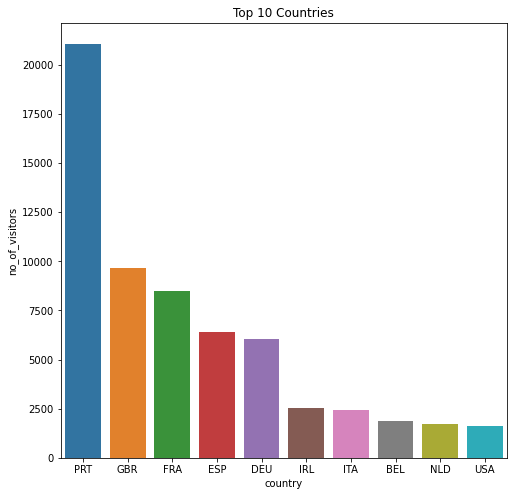

In [185]:
sns.barplot(x='country',data=top_countries,y='no_of_visitors')
plt.title('Top 10 Countries')

###Observations
* From the above we can obesrve that visitors spread across all over the world.
* But most of visitors are from Westren Europe and Southern Europe and USA 
we should focus more on these regions

In [204]:
monthly_mean_adr=df.loc[df['is_canceled']==0].groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
monthly_mean_adr

,arrival_date_month,hotel,adr
0,April,City Hotel,111.856824
1,April,Resort Hotel,75.867816
2,August,City Hotel,118.412083
3,August,Resort Hotel,181.205892
4,December,City Hotel,87.856764
5,December,Resort Hotel,68.322236
6,February,City Hotel,86.183025
7,February,Resort Hotel,54.147478
8,January,City Hotel,82.160634
9,January,Resort Hotel,48.708919


In [213]:
actual_guests=df.loc[df['is_canceled']==0]

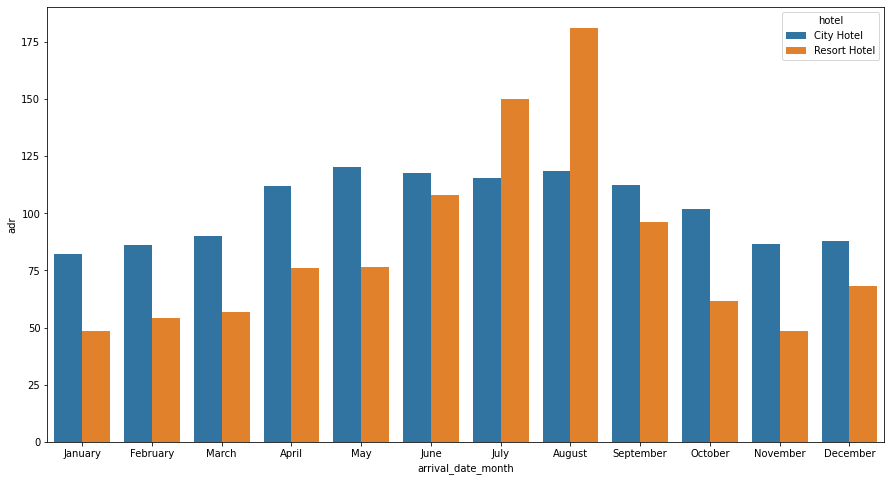

In [216]:
plt.figure(figsize=(15,8))
sns.barplot(x='arrival_date_month',y='adr',hue='hotel',data=monthly_mean_adr,order=['January','February','March','April','May','June','July','August','September'
,'October','November','December'])


###Observations

*   We can see the adr of resort hotel is more compared to the city hotel in july and august.
*   We can also see that adr of city hotel is more from April - October when compared to the November-March
*   May be the April - October has more profits to hotel because of better occupencies


In [156]:
meals=df['meal'].value_counts().index.to_list()
sizes=df['meal'].value_counts().to_list()

([<matplotlib.patches.Wedge at 0x7fc8ad39ae90>,
 [Text(-0.8323489200839225, 0.7191628989562298, 'BB'),
  Text(0.5524963068325438, -0.9511823331708804, 'HB'),
  Text(1.0199901030372185, -0.4118497173801685, 'SC'),
  Text(1.09708977274818, -0.07996268211701422, 'Undefined'),
  Text(1.099757494115253, -0.023096626102945154, 'FB')],
 [Text(-0.6053446691519436, 0.5230275628772579, '77.3%'),
  Text(0.40181549587821364, -0.6917689695788222, '12.1%'),
  Text(0.7418109840270679, -0.2995270671855771, '8.9%'),
  Text(0.7978834710895856, -0.058154677903283075, '1.0%'),
  Text(0.7998236320838203, -0.016797546256687387, '0.7%')])

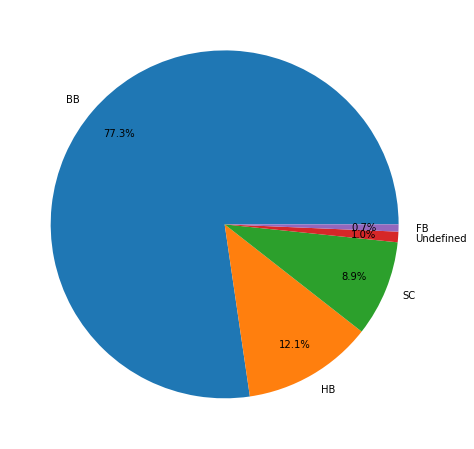

In [157]:
explode=(0,0,0,0.5,0.5)

plt.pie(sizes,labels=meals,autopct='%1.1f%%',pctdistance=0.8)

###Pbservations
* From the above we can observe that most of the people choosing only Breakfast for their meals.
* Less percentage of people are choosing "Breakfast and one meal" and self catering
* Almost no one is choosing 3 meals from the hotel 
* we should try to make more people choose full board or half board which generates revenue for the hotel